In [2]:
data = pd.read_csv("ins_fraud.csv")

# TO DO ANOMALY DETECTION 
- Perform anomaly detection, 
- Data need to divide by two grouop ("Normal", "various Attack ")

In [50]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,0,2,1,3,0,2,0,0.367910,2,0,...,-0.273436,1,0,0,-0.382013,0,0,0,-1,0
1,0,1,0,4,0,4,0,NaN,3,1,...,NaN,1,1,1,NaN,1,1,1,0,1
2,0,1,0,4,1,4,0,NaN,3,1,...,NaN,3,1,0,NaN,1,1,1,0,1
3,0,3,1,3,0,4,0,-3.009365,2,0,...,-0.273436,3,1,0,-0.382013,0,0,0,-1,0
4,0,1,0,1,0,1,0,0.367910,1,0,...,0.121305,1,0,0,0.672864,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,0.367910,2,0,...,-0.273436,1,1,0,-0.382013,0,0,0,-1,0
15996,0,2,0,2,1,4,0,0.367910,1,1,...,-0.273436,2,1,0,-0.382013,0,0,0,-1,0
15997,0,2,1,2,0,4,0,NaN,1,0,...,NaN,0,0,0,NaN,0,0,0,-1,1
15998,0,2,0,2,0,2,0,0.367910,2,0,...,-0.273436,4,1,0,-0.382013,0,0,0,-1,0


In [51]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 15959
Attack count: 41


In [5]:
# Convert DataFrame into Numpy arrays, keras need numpy
x_normal = df_normal.values
x_attack = df_attack.values

## Training the Autoencoder 

In [6]:
from sklearn.model_selection import train_test_split

- important to note that we are not using the outcome column as a label to predict
- This anomaly detection is unsupervised
- **no target (y)**
- train an autoencoder on the normal data 
- see how well it can detect that the data not flagged as "normal" represents an anomaly

In [7]:
x_normal_train, x_normal_test = train_test_split(
    x_normal, test_size=0.3, random_state=77)

In [8]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

Normal train count: 11171
Normal test count: 4788


# How to learn?

- The autoencoder will learn to compress the data to a vector of just three numbers
- autoencoder should be able to also decompress with reasonable accuracy

In [9]:
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=100)

Epoch 1/100
350/350 [==============================] - 1s 644us/step - loss: 207629074432.0000
Epoch 2/100
350/350 [==============================] - 0s 666us/step - loss: 6292238848.0000
Epoch 3/100
350/350 [==============================] - 0s 705us/step - loss: 436199168.0000
Epoch 4/100
350/350 [==============================] - 0s 690us/step - loss: 251013520.0000
Epoch 5/100
350/350 [==============================] - 0s 787us/step - loss: 111207160.0000
Epoch 6/100
350/350 [==============================] - 0s 679us/step - loss: 69333296.0000
Epoch 7/100
350/350 [==============================] - 0s 678us/step - loss: 87607672.0000
Epoch 8/100
350/350 [==============================] - 0s 641us/step - loss: 94372272.0000
Epoch 9/100
350/350 [==============================] - 0s 671us/step - loss: 50438704.0000
Epoch 10/100
350/350 [==============================] - 0s 725us/step - loss: 41351008.0000
Epoch 11/100
350/350 [==============================] - 0s 665us/step - loss: 10

350/350 [==============================] - 0s 636us/step - loss: 4051595.5000
Epoch 91/100
350/350 [==============================] - 0s 665us/step - loss: 5250331.0000
Epoch 92/100
350/350 [==============================] - 0s 645us/step - loss: 9958388.0000
Epoch 93/100
350/350 [==============================] - 0s 614us/step - loss: 289654080.0000
Epoch 94/100
350/350 [==============================] - 0s 768us/step - loss: 21530754.0000
Epoch 95/100
350/350 [==============================] - 0s 628us/step - loss: 902162.5000
Epoch 96/100
350/350 [==============================] - 0s 619us/step - loss: 5397521.0000
Epoch 97/100
350/350 [==============================] - 0s 624us/step - loss: 58714388.0000
Epoch 98/100
350/350 [==============================] - 0s 666us/step - loss: 527594336.0000
Epoch 99/100
350/350 [==============================] - 0s 637us/step - loss: 8338334.0000
Epoch 100/100
350/350 [==============================] - 0s 619us/step - loss: 6636544.5000


# Detecting an Anomaly 

- encoding data that represents an attack. This higher error indicates an anomaly.

In [10]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 1669.6661397145683
Insample Normal Score (RMSE): 1372.4415206152737
Anormal Data (RMSE): 1904.411213678603


# Autoencoder

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [18]:
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = "fraud"

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [19]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
1/1 [==============================] - 1s 791ms/step - loss: 0.1128 - mse: 0.1955 - val_loss: 0.1193 - val_mse: 0.2496
Epoch 2/20
1/1 [==============================] - 0s 29ms/step - loss: 0.1125 - mse: 0.1949 - val_loss: 0.1189 - val_mse: 0.2489
Epoch 3/20
1/1 [==============================] - 0s 29ms/step - loss: 0.1122 - mse: 0.1943 - val_loss: 0.1185 - val_mse: 0.2482
Epoch 4/20
1/1 [==============================] - 0s 34ms/step - loss: 0.1118 - mse: 0.1937 - val_loss: 0.1181 - val_mse: 0.2474
Epoch 5/20
1/1 [==============================] - 0s 32ms/step - loss: 0.1114 - mse: 0.1927 - val_loss: 0.1176 - val_mse: 0.2465
Epoch 6/20
1/1 [==============================] - 0s 36ms/step - loss: 0.1109 - mse: 0.1918 - val_loss: 0.1170 - val_mse: 0.2455
Epoch 7/20
1/1 [==============================] - 0s 38ms/step - loss: 0.1105 - mse: 0.1911 - val_loss: 0.1164 - val_mse: 0.2443
Epoch 8/20
1/1 [==============================] - 0s 30ms/step - loss: 0.1100 - mse: 0.1902 - va

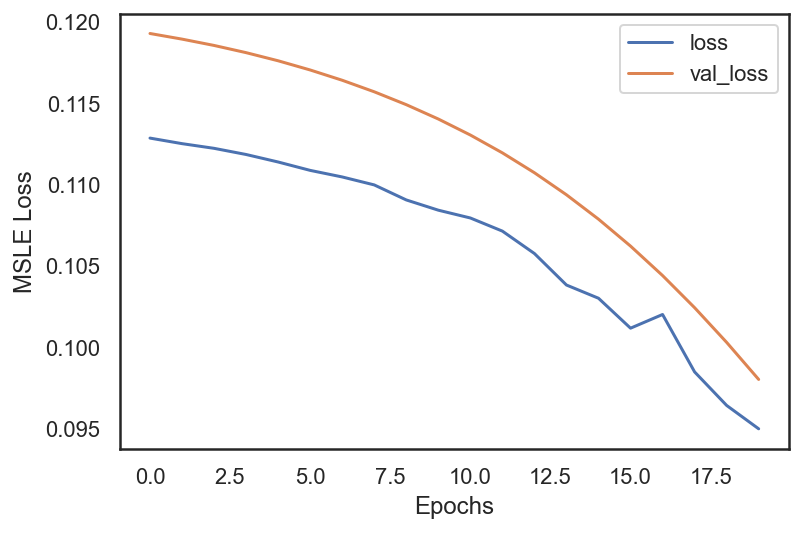

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [21]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)
# 0.944

Threshold: 0.1052157084323151


0.2340625

# 다시 해보기 z-score 맞춰서 

In [111]:
data = pd.read_csv("ins_fraud.csv")

In [112]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

# # Encode text values to dummy variables
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True)

In [113]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [114]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [115]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,2,1,3,0,2,0,0.367910,2,0,...,-0.296576,-0.273436,1,0,0,-0.382013,0,0,0,-1
3,0,3,1,3,0,4,0,-3.009365,2,0,...,2.047547,-0.273436,3,1,0,-0.382013,0,0,0,-1
4,0,1,0,1,0,1,0,0.367910,1,0,...,0.465808,0.121305,1,0,0,0.672864,0,0,0,-1
6,1,1,1,3,0,4,0,0.367910,3,0,...,-0.548760,0.123874,0,0,0,-0.382013,1,2,1,2
8,0,2,0,4,0,4,0,-3.009365,1,0,...,-0.548760,-0.273436,1,0,0,-0.382013,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,2,0,3,1,4,0,0.367910,1,0,...,0.743176,-0.273436,0,0,0,-0.382013,0,0,0,-1
15995,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,1,1,0,-0.382013,0,0,0,-1
15996,0,2,0,2,1,4,0,0.367910,1,1,...,0.648591,-0.273436,2,1,0,-0.382013,0,0,0,-1
15998,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,4,1,0,-0.382013,0,0,0,-1


In [116]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

In [117]:
data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 12845
Attack count: 34


In [118]:
x_normal = df_normal.values
x_attack = df_attack.values

In [119]:
from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(x_normal, test_size=0.2, random_state=13)

In [120]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

Normal train count: 10276
Normal test count: 2569


In [122]:
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=100)

Epoch 1/100
322/322 [==============================] - 1s 735us/step - loss: 1.0723
Epoch 2/100
322/322 [==============================] - 0s 889us/step - loss: 0.5678
Epoch 3/100
322/322 [==============================] - 0s 791us/step - loss: 0.5415
Epoch 4/100
322/322 [==============================] - 0s 680us/step - loss: 0.5348
Epoch 5/100
322/322 [==============================] - 0s 732us/step - loss: 0.5285
Epoch 6/100
322/322 [==============================] - 0s 669us/step - loss: 0.5217
Epoch 7/100
322/322 [==============================] - 0s 703us/step - loss: 0.5089
Epoch 8/100
322/322 [==============================] - 0s 675us/step - loss: 0.4816
Epoch 9/100
322/322 [==============================] - 0s 698us/step - loss: 0.4696
Epoch 10/100
322/322 [==============================] - 0s 692us/step - loss: 0.4596
Epoch 11/100
322/322 [==============================] - 0s 752us/step - loss: 0.4495
Epoch 12/100
322/322 [==============================] - 0s 763us/step - lo

322/322 [==============================] - 0s 653us/step - loss: 0.3365
Epoch 98/100
322/322 [==============================] - 0s 679us/step - loss: 0.3361
Epoch 99/100
322/322 [==============================] - 0s 677us/step - loss: 0.3360
Epoch 100/100
322/322 [==============================] - 0s 698us/step - loss: 0.3355


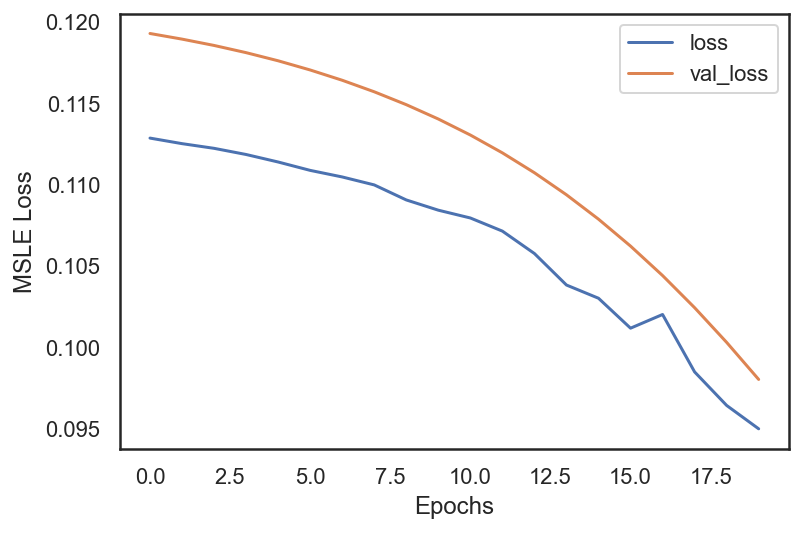

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [124]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")

Out of Sample Normal Score (RMSE): 0.5639148482459526
Insample Normal Score (RMSE): 0.5747194748288228
Anormal Data (RMSE): 0.6259502762132287


# mm

In [103]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [80]:
data = pd.read_csv("ins_fraud.csv")

In [81]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [82]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [83]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [84]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,2,1,3,0,2,0,0.367910,2,0,...,-0.296576,-0.273436,1,0,0,-0.382013,0,0,0,-1
3,0,3,1,3,0,4,0,-3.009365,2,0,...,2.047547,-0.273436,3,1,0,-0.382013,0,0,0,-1
4,0,1,0,1,0,1,0,0.367910,1,0,...,0.465808,0.121305,1,0,0,0.672864,0,0,0,-1
6,1,1,1,3,0,4,0,0.367910,3,0,...,-0.548760,0.123874,0,0,0,-0.382013,1,2,1,2
8,0,2,0,4,0,4,0,-3.009365,1,0,...,-0.548760,-0.273436,1,0,0,-0.382013,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,2,0,3,1,4,0,0.367910,1,0,...,0.743176,-0.273436,0,0,0,-0.382013,0,0,0,-1
15995,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,1,1,0,-0.382013,0,0,0,-1
15996,0,2,0,2,1,4,0,0.367910,1,1,...,0.648591,-0.273436,2,1,0,-0.382013,0,0,0,-1
15998,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,4,1,0,-0.382013,0,0,0,-1


In [85]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

In [86]:
data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 12845
Attack count: 34


In [87]:
x_normal = df_normal.values
x_attack = df_attack.values

In [107]:
x_normal = df_normal.values
x_attack = df_attack.values

from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(x_normal, test_size=0.2, random_state=13)

In [109]:
len(X_train), len(X_test)

(10276, 2569)

In [100]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(56*56,)))  # 입력계층
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # 은닉계층
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(128))                        # 은닉계층
    model.add(Activation('relu'))

    model.add(Dense(56*56))                # 출력계층
    model.add(Activation('linear'))

    return model

In [101]:
# model 함수 실행
model = AE()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               803072    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 3136)             

In [108]:
# Training 
# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

Epoch 1/20


ValueError: in user code:

    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 3136 but received input with shape (None, 23)


Normal Metric
         Normal_mse
count  12845.000000
mean       0.336300
std        0.701755
min        0.018772
25%        0.145639
50%        0.234653
75%        0.401606
max       57.988616


Anomaly Metric
       Anomaly_mse
count    34.000000
mean      0.366513
std       0.258006
min       0.099590
25%       0.253553
50%       0.298204
75%       0.439471
max       1.394652




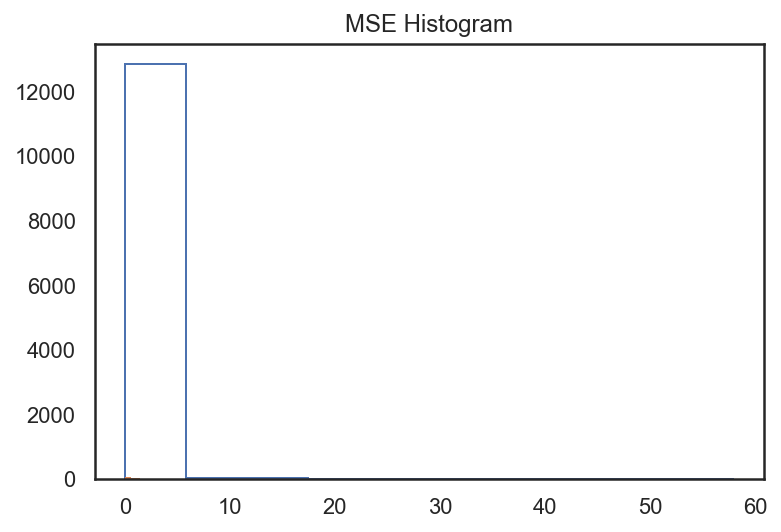

In [98]:
# Normal data (data_3000)
Nom_data = np.concatenate((X_test, X_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(x_attack) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(x_attack - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()

In [99]:
test_data = np.concatenate((X_test, x_attack), axis = 0)
y_true = np.concatenate((y_test, x_attack), axis = 0)

print(np.shape(test_data))
print(np.shape(y_true))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [96]:
# 각 이미지별 loss를 구하여 설정한 임계값으로 조건을 제시한다.
test_data_pred = model.predict(test_data)
all_cost = np.mean(np.power(test_data - test_data_pred, 2), axis=1)

threshold = 0.045  # 설정한 임계값 (선택 가능)

y_pred = [] #y_pred list 초기화
for i in range(len(all_cost)):
    if all_cost[i] > threshold :
        y_pred.insert(i, 0) #임계점보다 높으면 positive(이상)
    else:
        y_pred.insert(i, 1) #임계점보다 낮으면 negative(정상)
        
print(y_pred[0:100]) #프린트로 값을 확인할 수 있다 (확인용으로 100개만).
print(np.shape(y_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(2603,)


In [97]:
from sklearn.metrics import confusion_matrix #confusion_matrix 라이브러리 임포트

con_mat = confusion_matrix(y_true, y_pred) #confusion_matrix 함수 실행

# Print the confusion matrix as text.
TP = con_mat[0][0] #둘다 Anomal, 0이며 예측값이 positive(이상값)이다.
FN = con_mat[0][1] #실제값과 예측값이 달랐으며, 예측값이 negative(정상값)이다.
FP = con_mat[1][0] #실제값과 예측값이 달랐으며, 예측값이 postive(이상값)이다.
TN = con_mat[1][1] #둘다 nomal, 1이며 예측값이 negative(정상값)이다.
print('\n',
      'TP :', TP, '\n', 
      'FN :', FN, '\n', 
      'FP :', FP, '\n', 
      'TN :', TN, '\n')

Accuracy = (TP+TN)/(TP+FN+FP+TN) #정분류율 : 전체관측치 중 실제값과 예측치가 일치하는 정도
print('Accuracy(정분류율=(TP+TN)/(TP+FN+FP+TN)):', '{:.2%}'.format(Accuracy))

Error_rate = (FP+FN)/(TP+FN+FP+TN) #오분류율 : 전체 관측치 중 실제값과 예측치가 다른 정보 (1-accuracy)
print('Error_rate(오분류율=(FP+FN)/(TP+FN+FP+TN):', '{:.2%}'.format(Error_rate))

Precirion = TP/(TP+FP) #정확도 : TRUE로 예측한 관측치 중 실제값이 TRUE인 정도
print('Precirion(정확도=TP/(TP+FP)):', '{:.2%}'.format(Precirion))

Recall = TP/(TP+FN) #재현율 : 실제값이 TRUE인 관측치 중 예측치가 적중한 정도, 모형의 완정성을 평가함, 민감도
print('Recall(재현율,민감도=TP/(TP+FN)):', '{:.2%}'.format(Recall))

print('\n')
# Confusion Matrix 표 그리기
plt.imshow(con_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Plot 구성하기
plt.title('Confusion Matrix', fontsize=20) # Plot 이름
plt.tight_layout()
plt.colorbar()
label=["Anomal(0)", "Nomal(1)"] # 라벨값
tick_marks = np.arange(len(label)) 
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)

# 표 안에 숫자 기입하는 방법
name = [['TP','FN'], ['FP', 'TN']]
thresh = con_mat.max() / 2.
for i in range(2):
     for j in range(2):
        plt.text(j, i, str(name[i][j])+" = "+str(con_mat[i, j]),
                 horizontalalignment="center",
                 color="white" if con_mat[i, j] > thresh else "black",
                 fontsize=16)
    
plt.show()

NameError: name 'y_true' is not defined

# CLUSTERING 해보자 

In [126]:
data = pd.read_csv("ins_fraud.csv")

In [127]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    
    data[name] = (df[name] - mean) / sd

In [128]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [129]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")
encode_numeric_zscore(data, "c19")

In [130]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,2,1,3,0,2,0,0.367910,2,0,...,-0.296576,-0.273436,1,0,0,-0.382013,0,0,0,-1
3,0,3,1,3,0,4,0,-3.009365,2,0,...,2.047547,-0.273436,3,1,0,-0.382013,0,0,0,-1
4,0,1,0,1,0,1,0,0.367910,1,0,...,0.465808,0.121305,1,0,0,0.672864,0,0,0,-1
6,1,1,1,3,0,4,0,0.367910,3,0,...,-0.548760,0.123874,0,0,0,-0.382013,1,2,1,2
8,0,2,0,4,0,4,0,-3.009365,1,0,...,-0.548760,-0.273436,1,0,0,-0.382013,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,2,0,3,1,4,0,0.367910,1,0,...,0.743176,-0.273436,0,0,0,-0.382013,0,0,0,-1
15995,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,1,1,0,-0.382013,0,0,0,-1
15996,0,2,0,2,1,4,0,0.367910,1,1,...,0.648591,-0.273436,2,1,0,-0.382013,0,0,0,-1
15998,0,2,0,2,0,2,0,0.367910,2,0,...,-0.548760,-0.273436,4,1,0,-0.382013,0,0,0,-1


In [131]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

In [86]:
data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 12845
Attack count: 34


In [133]:
X_normal = df_normal.values
X_attack = df_attack.values

In [135]:
X_train, X_test = train_test_split(X_normal, test_size = 0.2, random_state = 13)
y_train, y_test  = train_test_split(X_attack, test_size = 0.2, random_state = 13)

In [142]:
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(X_train, X_train, epochs=100, batch_size=256)

Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 3.0044
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 1.9681
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.9388
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.7553
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.7125
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6784
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6409
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6106
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5862
Epoch 10/100
41/41 [==============================] - 0s 920us/step - loss: 0.5641
Epoch 11/100
41/41 [==============================] - 0s 857us/step - loss: 0.5462
Epoch 12/100
41/41 [==============================] - 0s 913us/step - loss: 0.5316
Epoch 13/100
41/41 [===========

41/41 [==============================] - 0s 870us/step - loss: 0.3956


In [144]:
# 잠재 변수 벡터 확보 
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(X_train)
print(latent_vector.shape)
print(latent_vector[0])

(10276, 23)
[ 1.8454393e+00  1.2722453e-01  2.7367911e+00  1.0363750e-01
  3.1744714e+00  2.6227936e-02  2.3973584e-03  1.9017291e+00
  1.7094547e-01  7.0953220e-02  1.4928610e+00  2.5410192e+00
  1.4535840e+00 -1.7756748e-01 -1.4301065e-01  1.5033309e+00
  3.0206087e-01  1.5155688e-01 -2.0618823e-01  8.5481226e-02
  8.2616448e-02  8.0688119e-02 -9.0241706e-01]


In [146]:
%%time 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=13)
kmeans.fit(latent_vector)

CPU times: user 2.22 s, sys: 705 ms, total: 2.93 s
Wall time: 905 ms


KMeans(n_clusters=10, random_state=13)

In [148]:
# 군집 결과 
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[9 8 0 ... 2 4 8]
(10, 23)
[ 1.76446295e+00  3.38508338e-02  2.37647629e+00  1.19686857e-01
  2.87670684e+00 -2.65259072e-02  3.62903565e-01  1.84370077e+00
  1.50766671e-01  8.27809721e-02  1.77624726e+00  2.13729978e+00
  1.11859322e+00 -3.81676480e-02 -2.25334793e-01  3.84321833e+00
  2.94711858e-01  1.11255795e-01  1.86442994e-02  2.91910768e-03
 -2.41969228e-02 -1.67758167e-02 -1.10260868e+00]


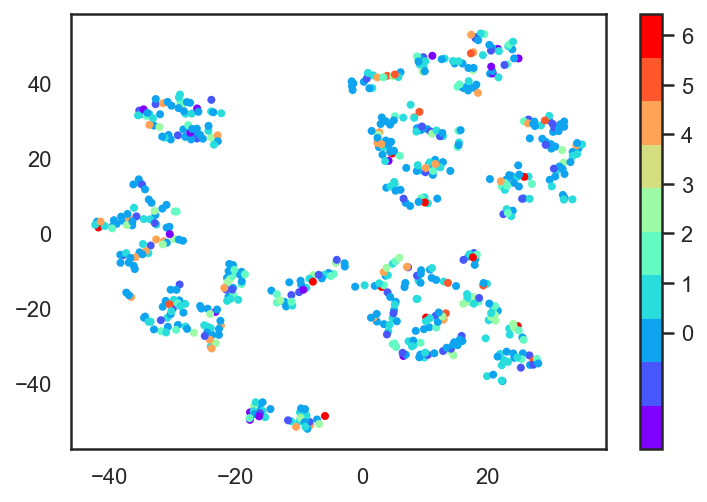

CPU times: user 11.7 s, sys: 572 ms, total: 12.3 s
Wall time: 1.83 s


In [160]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=13)
tsne_vector = tsne.fit_transform(latent_vector[:621])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=y_train[:621], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

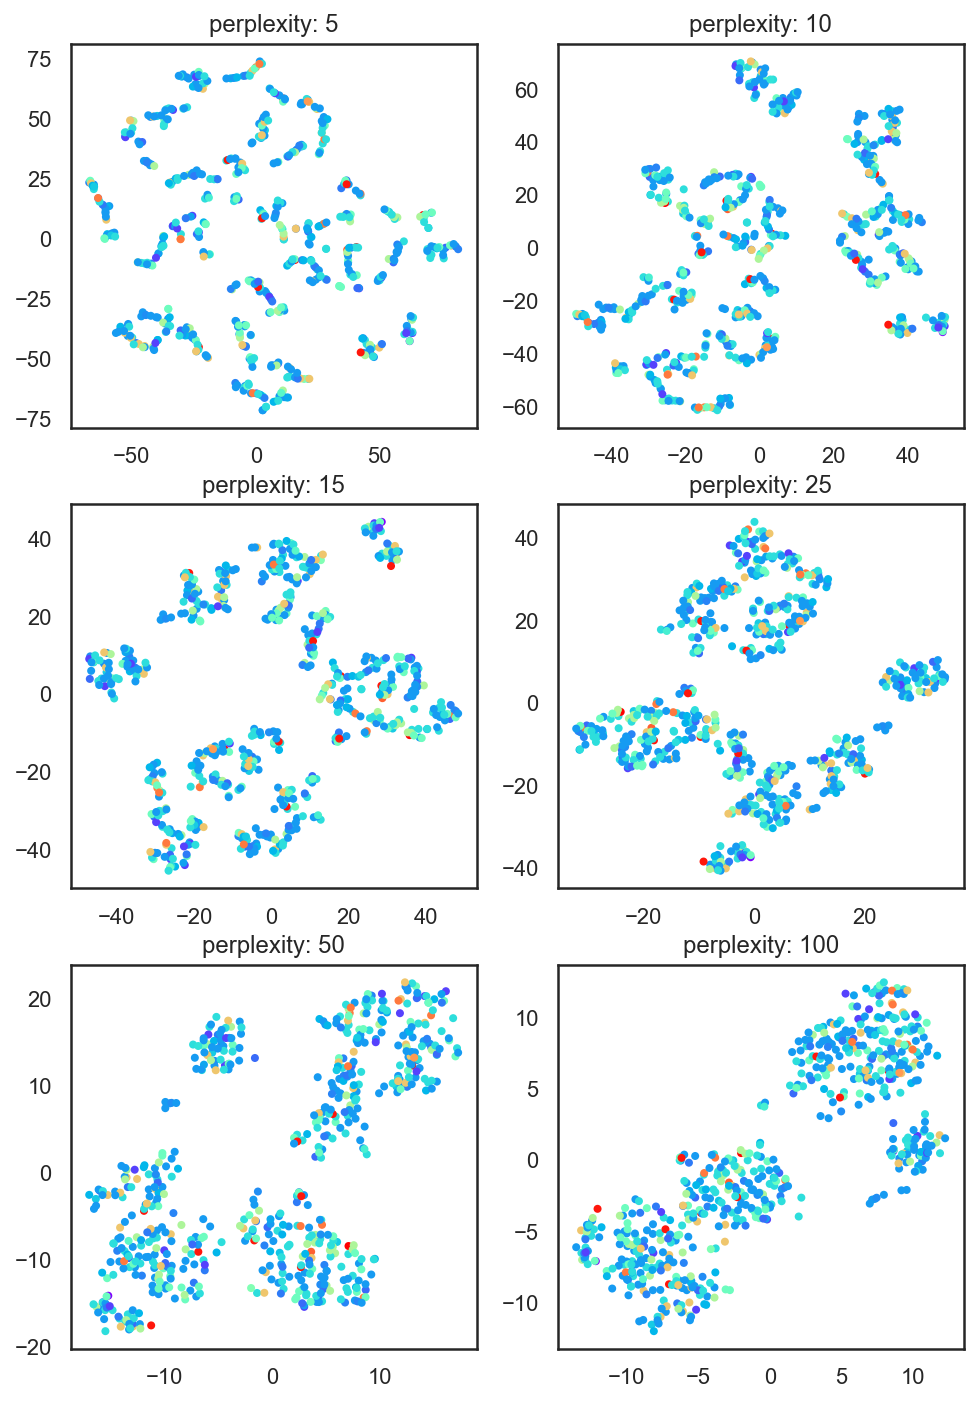

In [162]:
# 최근접이웃의 숫자 perplexities tuning 
perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8, 12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:621])
    
    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=y_train[:621], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))
plt.show()

# SMOTE를 쓴 다음 AUTOENCODER 

In [204]:
data = pd.read_csv("ins_fraud.csv")

In [205]:
val = data[data["c24"] == 1].drop("c24", 1)
data = data[data["c24"] == 0].drop("c24", 1)

In [206]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
0,0,2,1,3,0,2,0,100,2,0,...,1.302547e+05,0,1,0,0,1,0,0,0,-1
3,0,3,1,3,0,4,0,0,2,0,...,1.341009e+06,0,3,1,0,1,0,0,0,-1
4,0,1,0,1,0,1,0,100,1,0,...,5.240306e+05,1209410,1,0,0,2,0,0,0,-1
6,1,1,1,3,0,4,0,100,3,0,...,0.000000e+00,1217280,0,0,0,1,1,2,1,2
8,0,2,0,4,0,4,0,0,1,0,...,0.000000e+00,0,1,0,0,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,2,0,3,1,4,0,100,1,0,...,6.672931e+05,0,0,0,0,1,0,0,0,-1
15995,0,2,0,2,0,2,0,100,2,0,...,0.000000e+00,0,1,1,0,1,0,0,0,-1
15996,0,2,0,2,1,4,0,100,1,1,...,6.184394e+05,0,2,1,0,1,0,0,0,-1
15998,0,2,0,2,0,2,0,100,2,0,...,0.000000e+00,0,4,1,0,1,0,0,0,-1


In [207]:
X = data.drop("fraud", 1)
y = data[["fraud"]]

In [ ]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
X_sme, y_sme  = sme.fit_resample(X, y)

In [51]:
normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 15959
Attack count: 41


In [5]:
# Convert DataFrame into Numpy arrays, keras need numpy
x_normal = df_normal.values
x_attack = df_attack.values

In [184]:
encode_numeric_zscore(data, "c14")
encode_numeric_zscore(data, "c15")
encode_numeric_zscore(data, "c7")normal_mask = data['fraud']== 0
attack_mask = data['fraud']== 1

data.drop('fraud',axis=1,inplace=True)


df_normal = data[normal_mask]
df_attack = data[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

# Convert DataFrame into Numpy arrays, keras need numpy
x_normal = df_normal.values
x_attack = df_attack.values
encode_numeric_zscore(data, "c19")

In [192]:
df_normal = X_sme
df_attack = y_sme

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 25220
Attack count: 25220


In [193]:
x_normal = df_normal.values
x_attack = df_attack.values

In [194]:
from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(x_normal, test_size=0.2, random_state=13)

In [195]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")

Normal train count: 10276
Normal test count: 2569


In [198]:
model = Sequential()
model.add(Dense(25, input_dim=x_normal.shape[1], activation='relu'))
model.add(Dense(3, activation='relu')) # size to compress to

model.add(Dense(25, activation='relu'))
model.add(Dense(x_normal.shape[1])) # Multiple output neurons

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=1000)

Epoch 1/1000
322/322 [==============================] - 1s 920us/step - loss: 1.4409
Epoch 2/1000
322/322 [==============================] - 0s 828us/step - loss: 0.6824
Epoch 3/1000
322/322 [==============================] - 0s 873us/step - loss: 0.6331
Epoch 4/1000
322/322 [==============================] - 0s 831us/step - loss: 0.5975
Epoch 5/1000
322/322 [==============================] - 0s 863us/step - loss: 0.5798
Epoch 6/1000
322/322 [==============================] - 0s 822us/step - loss: 0.5697
Epoch 7/1000
322/322 [==============================] - 0s 848us/step - loss: 0.5638
Epoch 8/1000
322/322 [==============================] - 0s 838us/step - loss: 0.5589
Epoch 9/1000
322/322 [==============================] - 0s 811us/step - loss: 0.5534
Epoch 10/1000
322/322 [==============================] - 0s 787us/step - loss: 0.5470
Epoch 11/1000
322/322 [==============================] - 0s 798us/step - loss: 0.5402
Epoch 12/1000
322/322 [==============================] - 0s 753

322/322 [==============================] - 0s 1ms/step - loss: 0.4519
Epoch 97/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4518
Epoch 98/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4517
Epoch 99/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4512
Epoch 100/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4509
Epoch 101/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4510
Epoch 102/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4507
Epoch 103/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4499
Epoch 104/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4502
Epoch 105/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4501
Epoch 106/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.4496
Epoch 107/1000
322/322 [==============================] - 0s 1ms/step - loss: 0.449

322/322 [==============================] - 0s 852us/step - loss: 0.4327
Epoch 191/1000
322/322 [==============================] - 0s 869us/step - loss: 0.4326
Epoch 192/1000
322/322 [==============================] - 0s 848us/step - loss: 0.4327
Epoch 193/1000
322/322 [==============================] - 0s 858us/step - loss: 0.4319
Epoch 194/1000
322/322 [==============================] - 0s 848us/step - loss: 0.4326
Epoch 195/1000
322/322 [==============================] - 0s 840us/step - loss: 0.4318
Epoch 196/1000
322/322 [==============================] - 0s 856us/step - loss: 0.4313
Epoch 197/1000
322/322 [==============================] - 0s 845us/step - loss: 0.4311
Epoch 198/1000
322/322 [==============================] - 0s 846us/step - loss: 0.4315
Epoch 199/1000
322/322 [==============================] - 0s 868us/step - loss: 0.4314
Epoch 200/1000
322/322 [==============================] - 0s 860us/step - loss: 0.4311
Epoch 201/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 913us/step - loss: 0.4204
Epoch 285/1000
322/322 [==============================] - 0s 897us/step - loss: 0.4197
Epoch 286/1000
322/322 [==============================] - 0s 892us/step - loss: 0.4202
Epoch 287/1000
322/322 [==============================] - 0s 892us/step - loss: 0.4198
Epoch 288/1000
322/322 [==============================] - 0s 888us/step - loss: 0.4195
Epoch 289/1000
322/322 [==============================] - 0s 889us/step - loss: 0.4192
Epoch 290/1000
322/322 [==============================] - 0s 904us/step - loss: 0.4197
Epoch 291/1000
322/322 [==============================] - 0s 863us/step - loss: 0.4194
Epoch 292/1000
322/322 [==============================] - 0s 890us/step - loss: 0.4191
Epoch 293/1000
322/322 [==============================] - 0s 884us/step - loss: 0.4190
Epoch 294/1000
322/322 [==============================] - 0s 900us/step - loss: 0.4193
Epoch 295/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 843us/step - loss: 0.3256
Epoch 379/1000
322/322 [==============================] - 0s 813us/step - loss: 0.3258
Epoch 380/1000
322/322 [==============================] - 0s 845us/step - loss: 0.3248
Epoch 381/1000
322/322 [==============================] - 0s 837us/step - loss: 0.3247
Epoch 382/1000
322/322 [==============================] - 0s 829us/step - loss: 0.3245
Epoch 383/1000
322/322 [==============================] - 0s 840us/step - loss: 0.3248
Epoch 384/1000
322/322 [==============================] - 0s 816us/step - loss: 0.3242
Epoch 385/1000
322/322 [==============================] - 0s 828us/step - loss: 0.3243
Epoch 386/1000
322/322 [==============================] - 0s 838us/step - loss: 0.3237
Epoch 387/1000
322/322 [==============================] - 0s 835us/step - loss: 0.3235
Epoch 388/1000
322/322 [==============================] - 0s 837us/step - loss: 0.3237
Epoch 389/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 880us/step - loss: 0.3072
Epoch 473/1000
322/322 [==============================] - 0s 860us/step - loss: 0.3074
Epoch 474/1000
322/322 [==============================] - 0s 866us/step - loss: 0.3070
Epoch 475/1000
322/322 [==============================] - 0s 877us/step - loss: 0.3073
Epoch 476/1000
322/322 [==============================] - 0s 845us/step - loss: 0.3069
Epoch 477/1000
322/322 [==============================] - 0s 859us/step - loss: 0.3066
Epoch 478/1000
322/322 [==============================] - 0s 868us/step - loss: 0.3063
Epoch 479/1000
322/322 [==============================] - 0s 852us/step - loss: 0.3074
Epoch 480/1000
322/322 [==============================] - 0s 845us/step - loss: 0.3066
Epoch 481/1000
322/322 [==============================] - 0s 839us/step - loss: 0.3063
Epoch 482/1000
322/322 [==============================] - 0s 858us/step - loss: 0.3059
Epoch 483/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 865us/step - loss: 0.3008
Epoch 567/1000
322/322 [==============================] - 0s 839us/step - loss: 0.3011
Epoch 568/1000
322/322 [==============================] - 0s 854us/step - loss: 0.3005
Epoch 569/1000
322/322 [==============================] - 0s 859us/step - loss: 0.3009
Epoch 570/1000
322/322 [==============================] - 0s 895us/step - loss: 0.3009
Epoch 571/1000
322/322 [==============================] - 0s 873us/step - loss: 0.3015
Epoch 572/1000
322/322 [==============================] - 0s 896us/step - loss: 0.3005
Epoch 573/1000
322/322 [==============================] - 0s 986us/step - loss: 0.3011
Epoch 574/1000
322/322 [==============================] - 0s 904us/step - loss: 0.3003
Epoch 575/1000
322/322 [==============================] - 0s 876us/step - loss: 0.3005
Epoch 576/1000
322/322 [==============================] - 0s 906us/step - loss: 0.3006
Epoch 577/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 878us/step - loss: 0.2990
Epoch 661/1000
322/322 [==============================] - 0s 881us/step - loss: 0.2982
Epoch 662/1000
322/322 [==============================] - 0s 901us/step - loss: 0.3003
Epoch 663/1000
322/322 [==============================] - 0s 856us/step - loss: 0.2980
Epoch 664/1000
322/322 [==============================] - 0s 846us/step - loss: 0.2993
Epoch 665/1000
322/322 [==============================] - 0s 862us/step - loss: 0.2985
Epoch 666/1000
322/322 [==============================] - 0s 859us/step - loss: 0.2994
Epoch 667/1000
322/322 [==============================] - 0s 887us/step - loss: 0.2983
Epoch 668/1000
322/322 [==============================] - 0s 845us/step - loss: 0.2978
Epoch 669/1000
322/322 [==============================] - 0s 832us/step - loss: 0.2983
Epoch 670/1000
322/322 [==============================] - 0s 810us/step - loss: 0.2985
Epoch 671/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 858us/step - loss: 0.2963
Epoch 755/1000
322/322 [==============================] - 0s 839us/step - loss: 0.2965
Epoch 756/1000
322/322 [==============================] - 0s 846us/step - loss: 0.2967
Epoch 757/1000
322/322 [==============================] - 0s 840us/step - loss: 0.2962
Epoch 758/1000
322/322 [==============================] - 0s 840us/step - loss: 0.2963
Epoch 759/1000
322/322 [==============================] - 0s 824us/step - loss: 0.2978
Epoch 760/1000
322/322 [==============================] - 0s 831us/step - loss: 0.2968
Epoch 761/1000
322/322 [==============================] - 0s 808us/step - loss: 0.2975
Epoch 762/1000
322/322 [==============================] - 0s 822us/step - loss: 0.2963
Epoch 763/1000
322/322 [==============================] - 0s 841us/step - loss: 0.2964
Epoch 764/1000
322/322 [==============================] - 0s 843us/step - loss: 0.2962
Epoch 765/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 808us/step - loss: 0.2936
Epoch 849/1000
322/322 [==============================] - 0s 827us/step - loss: 0.2945
Epoch 850/1000
322/322 [==============================] - 0s 828us/step - loss: 0.2959
Epoch 851/1000
322/322 [==============================] - 0s 816us/step - loss: 0.2950
Epoch 852/1000
322/322 [==============================] - 0s 831us/step - loss: 0.2938
Epoch 853/1000
322/322 [==============================] - 0s 793us/step - loss: 0.2938
Epoch 854/1000
322/322 [==============================] - 0s 828us/step - loss: 0.2936
Epoch 855/1000
322/322 [==============================] - 0s 825us/step - loss: 0.2946
Epoch 856/1000
322/322 [==============================] - 0s 816us/step - loss: 0.2943
Epoch 857/1000
322/322 [==============================] - 0s 818us/step - loss: 0.2938
Epoch 858/1000
322/322 [==============================] - 0s 815us/step - loss: 0.2933
Epoch 859/1000
322/322 [==============================] - 

322/322 [==============================] - 0s 827us/step - loss: 0.2920
Epoch 943/1000
322/322 [==============================] - 0s 802us/step - loss: 0.2921
Epoch 944/1000
322/322 [==============================] - 0s 815us/step - loss: 0.2927
Epoch 945/1000
322/322 [==============================] - 0s 809us/step - loss: 0.2917
Epoch 946/1000
322/322 [==============================] - 0s 795us/step - loss: 0.2921
Epoch 947/1000
322/322 [==============================] - 0s 883us/step - loss: 0.2918
Epoch 948/1000
322/322 [==============================] - 0s 832us/step - loss: 0.2929
Epoch 949/1000
322/322 [==============================] - 0s 820us/step - loss: 0.2930
Epoch 950/1000
322/322 [==============================] - 0s 853us/step - loss: 0.2918
Epoch 951/1000
322/322 [==============================] - 0s 844us/step - loss: 0.2915
Epoch 952/1000
322/322 [==============================] - 0s 825us/step - loss: 0.2916
Epoch 953/1000
322/322 [==============================] - 

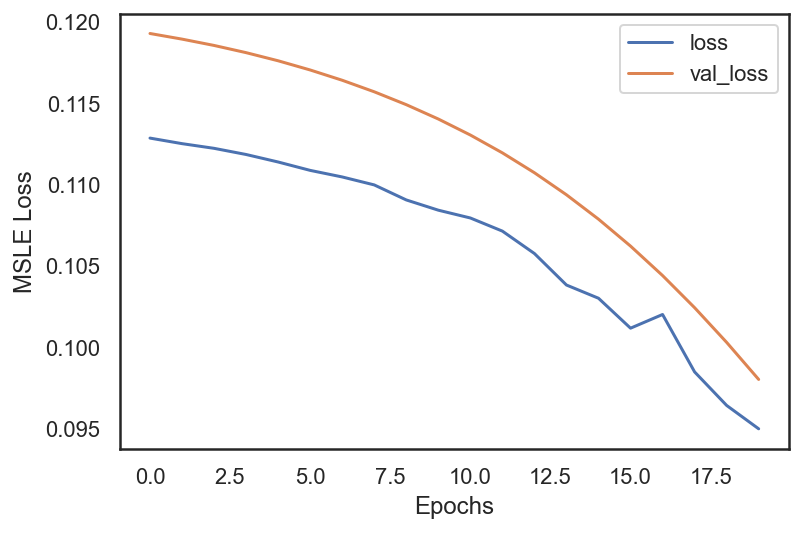

In [199]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [200]:
pred = model.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = model.predict(x_normal)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal))
pred = model.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Anormal Data (RMSE): {score3}")

ValueError: in user code:

    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/sunny/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_11 is incompatible with the layer: expected axis -1 of input shape to have value 23 but received input with shape (None, 1)
